<a href="https://colab.research.google.com/github/gkrry2723/ML_pytorch_study/blob/master/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DNN**



####**1. DNN 1 layer**
- xor 불가
- DNN으로 xor하는 코드

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

#데이터
X=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
Y=torch.FloatTensor([[0],[1],[1],[0]])

#model 만들기
#layer 선언-fully connected
linear=torch.nn.Linear(2,1,bias=True)
#activation function으로 sigmoid 선택
sigmoid=torch.nn.Sigmoid()
model=torch.nn.Sequential(linear,sigmoid)

#loss define- binary cross entrophy loss
criterion=torch.nn.BCELoss()
#optimizer define
optimizer=torch.optim.SGD(model.parameters(),lr=1)

for step in range(10001):
  optimizer.zero_grad()
  #perceptron에 X를 넣자
  hypothesis = model(X)

  #hypothesis와 Y의 차이를 cost로 하는 줄인듯!
  cost=criterion(hypothesis,Y)
  cost.backward()
  
  optimizer.step()

  if step%100==0:
    print(step, cost.item())

####**2. DNN multi layer**


In [5]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

#데이터
X=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
Y=torch.FloatTensor([[0],[1],[1],[0]])

#model 만들기
#layer 선언-fully connected
linear1=torch.nn.Linear(2,2,bias=True)
linear2=torch.nn.Linear(2,1,bias=True)
#activation function으로 sigmoid 선택
sigmoid=torch.nn.Sigmoid()
model=torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid)

#loss define- binary cross entrophy loss
criterion=torch.nn.BCELoss()
#optimizer define
optimizer=torch.optim.SGD(model.parameters(),lr=1)

for step in range(10001):
  optimizer.zero_grad()
  #perceptron에 X를 넣자
  hypothesis = model(X)

  #hypothesis와 Y의 차이를 cost로 하는 줄인듯!
  cost=criterion(hypothesis,Y)
  cost.backward()
  
  optimizer.step()

  if step%1000==0:
    print(step, cost.item())

0 0.694481372833252
1000 0.01794702187180519
2000 0.006236325949430466
3000 0.003743944223970175
4000 0.002669042907655239
5000 0.0020716949366033077
6000 0.001691974001005292
7000 0.0014294086722657084
8000 0.0012371568009257317
9000 0.0010902927024289966
10000 0.0009744912385940552


####**3. DNN with ReLU**
- MNIST ReLU랑 Adam 이용해서 해보기
- sigmoid의 문제점: 앞쪽으로 갈수록 **gradient vanish**가 될 수 있는 문제가 생김
- ReLU는 f(x)=max(0,x)여서 gradient vanish가 되지 않음

Epoch: 0001 cost = 147.740356445
Epoch: 0002 cost = 36.792125702
Epoch: 0003 cost = 23.356882095
Epoch: 0004 cost = 16.210615158
Epoch: 0005 cost = 11.514391899
Epoch: 0006 cost = 8.452229500
Epoch: 0007 cost = 6.385204315
Epoch: 0008 cost = 4.624919891
Epoch: 0009 cost = 3.514826536
Epoch: 0010 cost = 2.546171188
Epoch: 0011 cost = 1.926395059
Epoch: 0012 cost = 1.446961284
Epoch: 0013 cost = 1.091358781
Epoch: 0014 cost = 0.847503126
Epoch: 0015 cost = 0.752348423
Learning finished
Accuracy: 0.9448999762535095
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


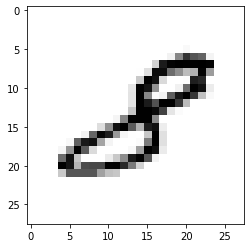

In [5]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
training_epochs = 15
batch_size = 100

#MNIST dataset
#root: 경로 || train: true일때-trainset 불러오기/false일때-testset 불러오기 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
# class 개수: 10
linear1 = torch.nn.Linear(784, 256, bias=True).to(device)
linear2 = torch.nn.Linear(256, 256, bias=True).to(device)
linear3 = torch.nn.Linear(256, 10, bias=True).to(device)
relu = torch.nn.ReLU()

#initialization- weight들 다 normal distribution 따를 수 있도록!
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

model = torch.nn.Sequential(linear1,relu,linear2,relu,linear3)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

####**4. Weight initialization**
- 좋은 weight initialization에 대해 알아보기
- 1. xavier-> normal, uniform
  2. He -> normal, uniform
- 아래는 xavier uniform
- initialization만 열심히 해도 성능이 엄청 올라감!!

Epoch: 0001 cost = 0.237696201
Epoch: 0002 cost = 0.090060562
Epoch: 0003 cost = 0.060129534
Epoch: 0004 cost = 0.042147882
Epoch: 0005 cost = 0.031874448
Epoch: 0006 cost = 0.026797391
Epoch: 0007 cost = 0.021004329
Epoch: 0008 cost = 0.019753205
Epoch: 0009 cost = 0.017727613
Epoch: 0010 cost = 0.013021396
Epoch: 0011 cost = 0.012808259
Epoch: 0012 cost = 0.012115543
Epoch: 0013 cost = 0.011558278
Epoch: 0014 cost = 0.010352027
Epoch: 0015 cost = 0.008813562
Learning finished
Accuracy: 0.981499969959259
Label:  8
Prediction:  8


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


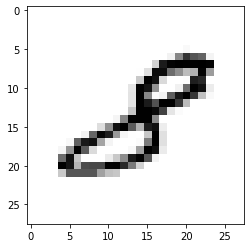

In [6]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
training_epochs = 15
batch_size = 100

#MNIST dataset
#root: 경로 || train: true일때-trainset 불러오기/false일때-testset 불러오기 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
# class 개수: 10
linear1 = torch.nn.Linear(784, 256, bias=True).to(device)
linear2 = torch.nn.Linear(256, 256, bias=True).to(device)
linear3 = torch.nn.Linear(256, 10, bias=True).to(device)
relu = torch.nn.ReLU()

#initialization- weight들 다 normal distribution 따를 수 있도록!
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

model = torch.nn.Sequential(linear1,relu,linear2,relu,linear3)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

####**5. Dropout**
- overfitting을 해결하기 위한 방법
- train 시에 fully connected 하게 하지 않고 각 layer마다 probability 기준으로 몇개의 노드만 선택해서 weight를 계산함!


Epoch: 0001 cost = 0.666846573
Epoch: 0002 cost = 0.290408343
Epoch: 0003 cost = 0.232271776
Epoch: 0004 cost = 0.203832030
Epoch: 0005 cost = 0.185078859
Epoch: 0006 cost = 0.169069335
Epoch: 0007 cost = 0.161121801
Epoch: 0008 cost = 0.147035956
Epoch: 0009 cost = 0.146691471
Epoch: 0010 cost = 0.136739552
Epoch: 0011 cost = 0.133360431
Epoch: 0012 cost = 0.126872450
Epoch: 0013 cost = 0.123109788
Epoch: 0014 cost = 0.124031857
Epoch: 0015 cost = 0.118019447
Learning finished
Accuracy: 0.9695999622344971
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


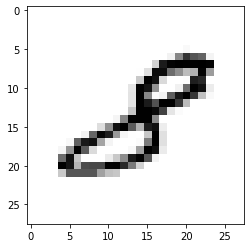

In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
training_epochs = 15
batch_size = 100

#MNIST dataset
#root: 경로 || train: true일때-trainset 불러오기/false일때-testset 불러오기 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
# class 개수: 10
linear1 = torch.nn.Linear(784, 256, bias=True).to(device)
linear2 = torch.nn.Linear(256, 256, bias=True).to(device)
linear3 = torch.nn.Linear(256, 256, bias=True).to(device)
linear4 = torch.nn.Linear(256, 256, bias=True).to(device)
linear5 = torch.nn.Linear(256, 10, bias=True).to(device)
relu = torch.nn.ReLU()
#dropout 설정
dropout=torch.nn.Dropout(p=0.5)

#initialization- weight들 다 normal distribution 따를 수 있도록!
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

model = torch.nn.Sequential(linear1,relu,dropout,
                            linear2,relu,dropout,
                            linear3,relu,dropout,
                            linear4,relu,dropout,
                            linear5).to(device)

model.train()
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

with torch.no_grad():
    model.eval()
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

####**6. Batch Normalization**
- gradient vanishing, exploding을 해결하기 위한 방법
- internal covariate shift를 없애주기

Epoch: 0001 cost = 0.191153243
Epoch: 0002 cost = 0.075596310
Epoch: 0003 cost = 0.048531178
Epoch: 0004 cost = 0.035912409
Epoch: 0005 cost = 0.028744811
Epoch: 0006 cost = 0.021562837
Epoch: 0007 cost = 0.019940732
Epoch: 0008 cost = 0.017545050
Epoch: 0009 cost = 0.015638296
Epoch: 0010 cost = 0.012780959
Epoch: 0011 cost = 0.014275757
Epoch: 0012 cost = 0.010129713
Epoch: 0013 cost = 0.010331332
Epoch: 0014 cost = 0.010465812
Epoch: 0015 cost = 0.008571445
Learning finished
Accuracy: 0.7856999635696411
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


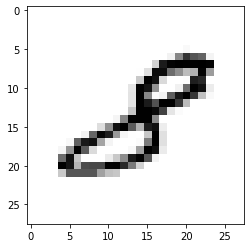

In [10]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
training_epochs = 15
batch_size = 100

#MNIST dataset
#root: 경로 || train: true일때-trainset 불러오기/false일때-testset 불러오기 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
# class 개수: 10
linear1 = torch.nn.Linear(784, 256, bias=True).to(device)
linear2 = torch.nn.Linear(256, 256, bias=True).to(device)
linear3 = torch.nn.Linear(256, 10, bias=True).to(device)
relu = torch.nn.ReLU()
#batchnorm 설정
bn1 = torch.nn.BatchNorm1d(256)
bn2 = torch.nn.BatchNorm1d(256)

#initialization- weight들 다 normal distribution 따를 수 있도록!
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

model = torch.nn.Sequential(linear1,bn1,relu,
                            linear2,bn2,relu,
                            linear3).to(device)

model.train()
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

with torch.no_grad():
    model.eval()
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()